# Part I: Setup & Data

Group Members
--
Ethan Chen

Overview
--
This project measures the crime rates in Los Angeles, United States during the COVID-19 pandemic (March 4, 2020 to June 15, 2021) and analyzes the effect of lockdown on different neighborhoods. We used governmental data (data.gov) to analyze several types of crime, including Fraud, Drug, Burglary, Vandalism, Larceny, and other misendeavors and felonies.



In [ ]:
# import pandas & numpy library
import pandas as pd
import numpy as np
import time
import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (16, 8)

# packages helpful for webscraping
import requests
import bs4
from bs4 import BeautifulSoup

#improve resolution
%config InlineBackend.figure_format ='retina'

# Getting the Data

In [ ]:
start = time.time()

crime_df = pd.read_csv('https://data.lacity.org/api/views/2nrs-mtv8/rows.csv')
crime_df.head()
print(crime_df.size)

end = time.time()
print(end - start)

In [ ]:
crime_df.head()
#print(crime_df['AREA NAME'].unique())

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
print(crime_df.shape)
crime_df.describe()

(677905, 28)


,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,6.779050e+05,677905.000000,677905.000000,677905.000000,677905.000000,677905.000000,677905.000000,677897.000000,235770.000000,677897.000000,50706.000000,1709.000000,51.000000,677905.000000,677905.000000
mean,2.129822e+08,1333.367149,10.718400,1118.216018,1.416290,500.625297,29.991356,304.568303,362.196119,500.363508,956.516408,983.343476,990.470588,33.959657,-117.958357
std,9.212376e+06,654.655775,6.089464,608.943409,0.492943,207.853710,21.676154,216.284751,123.812918,207.642254,113.124192,52.580102,29.499392,1.969828,6.832065
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.019098e+08,900.000000,6.000000,622.000000,1.000000,330.000000,12.000000,101.000000,308.000000,330.000000,998.000000,998.000000,998.000000,34.013200,-118.429600
50%,2.115076e+08,1410.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058300,-118.321400
75%,2.210101e+08,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163100,-118.273900
max,2.399090e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


# Cleaning the Data
I'm storing the cleaner data in crime_la_clean but all the original data will still be stored in crime_df in case we want to use it.

In [ ]:
start = time.time()

crime_la_clean = crime_df
crime_la_clean = crime_la_clean.drop(['DR_NO', 'Date Rptd', 'AREA', 'Rpt Dist No', 'Status',
                                      'Status Desc', 'LOCATION', 'Cross Street', 'LAT', 'LON', 'Premis Desc'], axis=1)
crime_la_clean.head()

end = time.time()
print(end - start)

0.11732673645019531


# LA DataFrame
Data visualizations for crime in neighboring cities in Los Angeles. 

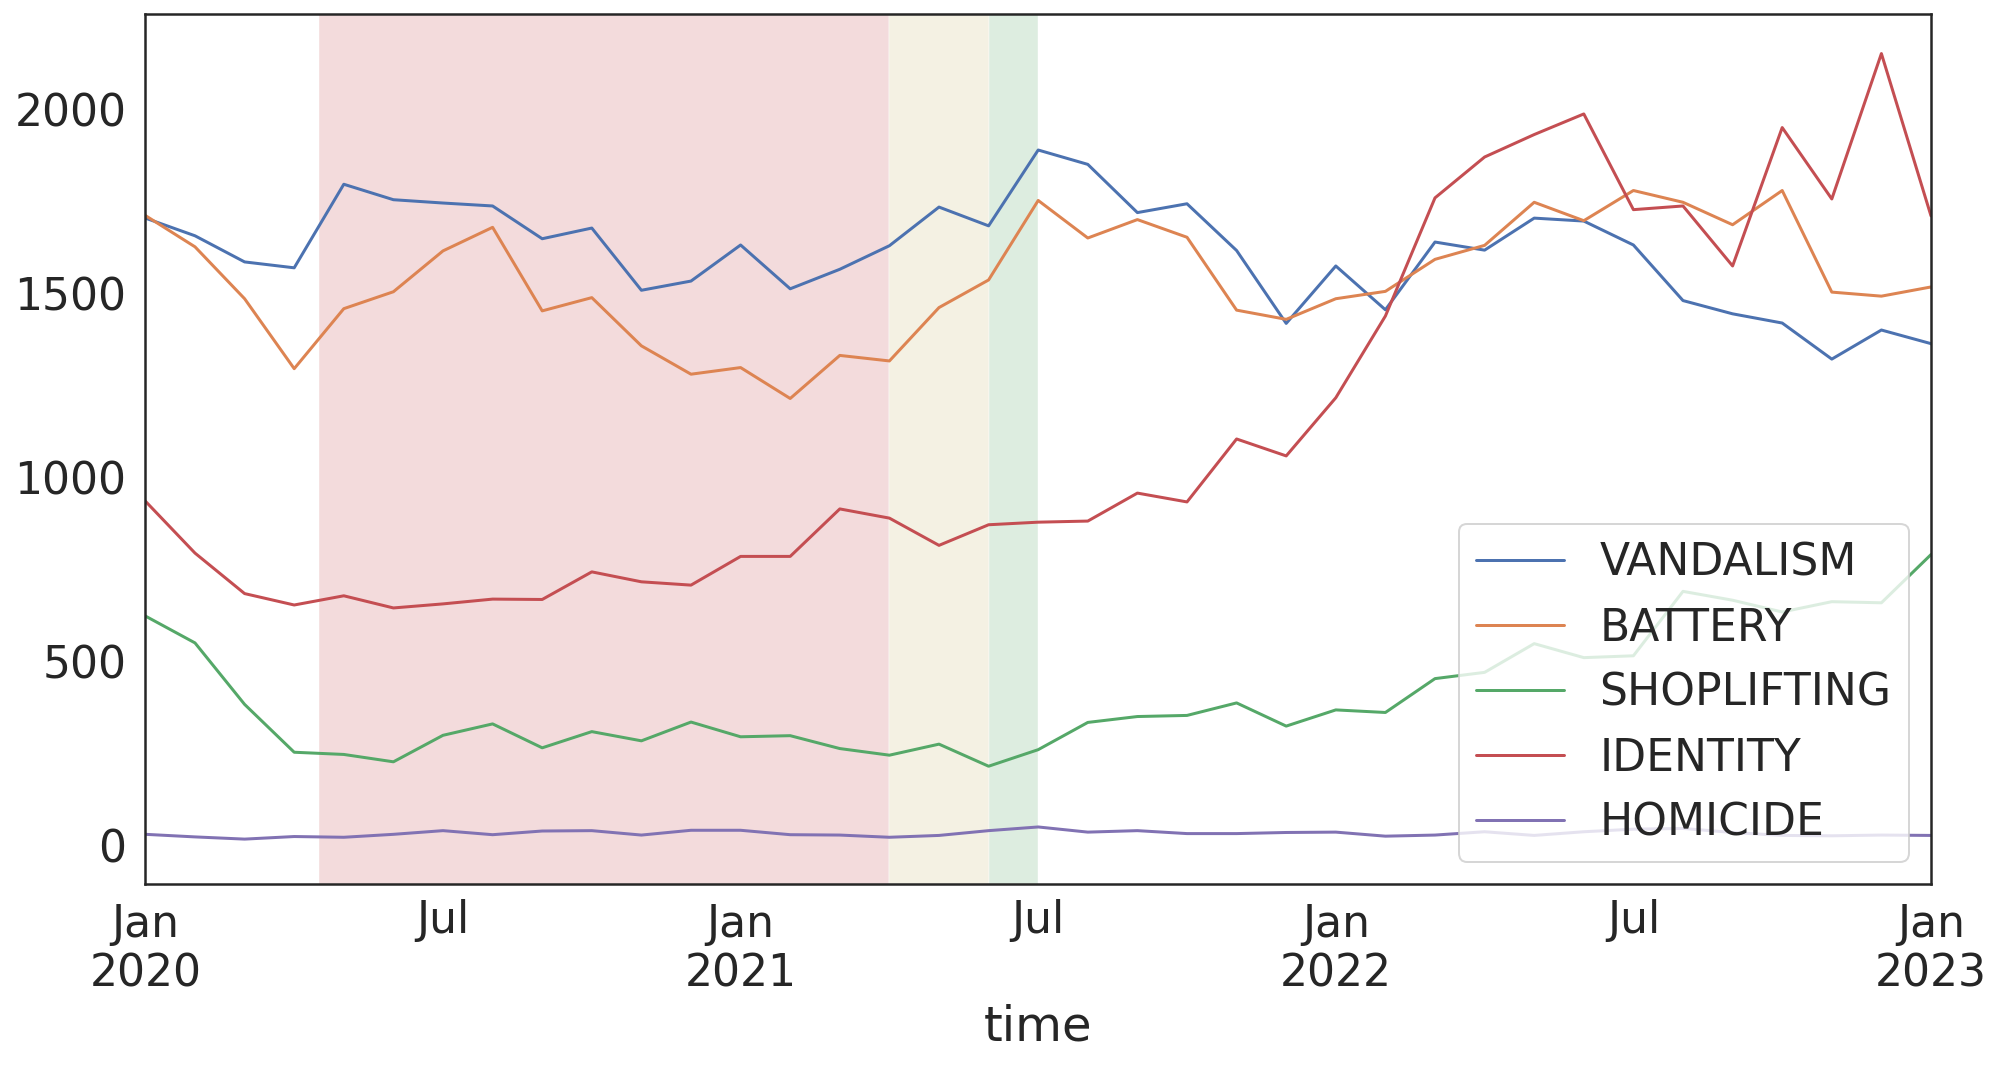

{2020: 47184}


In [ ]:
fig, ax = plt.subplots()
crimes = ['VANDALISM', 'BATTERY', 'SHOPLIFTING', 'IDENTITY', 'HOMICIDE']
crime_df['time'] = pd.to_datetime(crime_df['DATE OCC'])
for crime in crimes:
    df = crime_df[crime_df['Crm Cd Desc'].str.contains(crime, na=False)]
    df['time'] = pd.to_datetime(df['DATE OCC'])
    df = df['DATE OCC'].groupby(df.time.dt.to_period('M')).agg('count')
    df.plot(ax=ax, label=crime)

plt.legend(loc="lower right")
plt.axvspan(603.5, 615, facecolor='r', alpha=0.2)
plt.axvspan(615, 617, facecolor='y', alpha=0.2)
plt.axvspan(617, 618, facecolor='g', alpha=0.2)
plt.xlim(600, 636)

plt.show()
#sns.lineplot(data=grouped, x='time')

year_totals = {}

year = 2020
start = datetime.datetime(year, 3, 19)
end = datetime.datetime(year, 6, 15)
filtered_time = crime_df[crime_df['time'] >= start]
filtered_time = filtered_time[filtered_time['time'] <= end]
year_totals[year] = len(filtered_time.index)

print(year_totals)




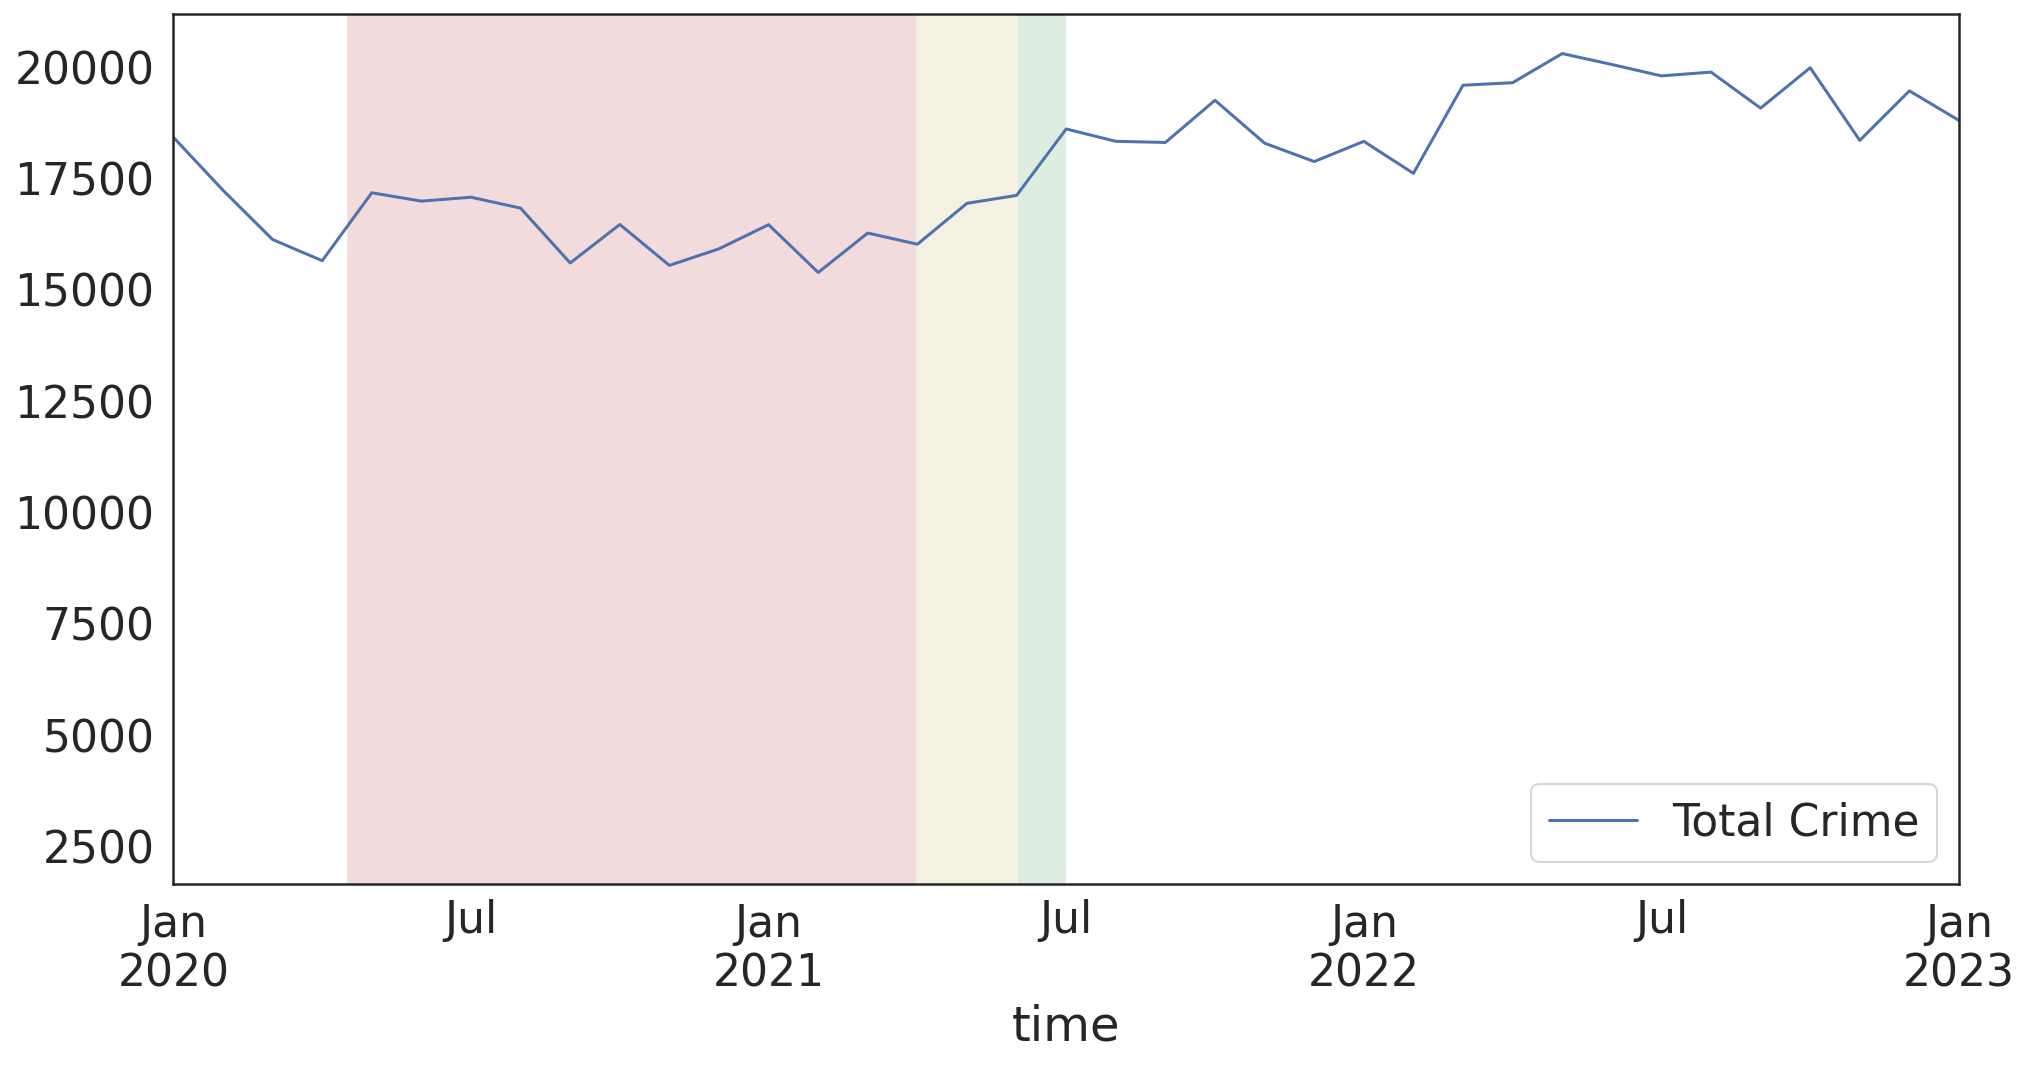

In [ ]:
fig, ax = plt.subplots()
df = crime_df
df['time'] = pd.to_datetime(df['DATE OCC'])
df = df['DATE OCC'].groupby(df.time.dt.to_period('M')).agg('count')
df.plot(ax=ax, label='Total Crime')

plt.legend(loc="lower right")
plt.axvspan(603.5, 615, facecolor='r', alpha=0.2)
plt.axvspan(615, 617, facecolor='y', alpha=0.2)
plt.axvspan(617, 618, facecolor='g', alpha=0.2)
plt.xlim(600, 636)

plt.show()

In [ ]:
AREA NAME

time
2020-01    29
2020-02    22
2020-03    16
2020-04    23
2020-05    21
Freq: M, Name: DATE OCC, dtype: int64

In [ ]:
crime_df['time'] = pd.to_datetime(crime_df['DATE OCC'])

In [ ]:
sns.barplot(data = crime_df, x = 'time', y = )

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,time
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020-01-08
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020-01-01
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020-02-13
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020-01-01
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020-01-01


# SF csv

In [ ]:
sf = pd.read_csv('https://data.sfgov.org/api/views/wg3w-h783/rows.csv')
sf.head()


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2021/07/25 12:00:00 AM,2021/07/25,00:00,2021,Sunday,2021/07/25 01:41:00 PM,105718906372,1057189,216105573,NaN,II,Coplogic Initial,True,6372,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,NaN,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022/06/28 11:58:00 PM,2022/06/28,23:58,2022,Tuesday,2022/06/28 11:58:00 PM,116554371012,1165543,220264913,NaN,VS,Vehicle Supplement,NaN,71012,Other Offenses,Other Offenses,"License Plate, Recovered",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022/03/11 10:30:00 AM,2022/03/11,10:30,2022,Friday,2022/03/11 08:03:00 PM,113048071000,1130480,226040232,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/05/15 05:47:00 PM,2021/05/15,17:47,2021,Saturday,2021/05/15 05:47:00 PM,103051807043,1030518,210183345,NaN,VS,Vehicle Supplement,NaN,7043,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Motorcycle",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022/06/28 05:22:00 PM,2022/06/28,17:22,2022,Tuesday,2022/06/28 05:22:00 PM,116535107041,1165351,220361741,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sf.tail()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
703767,2023/01/25 12:00:00 AM,2023/01/25,00:00,2023,Wednesday,2023/02/23 12:38:00 PM,124752028160,1247520,230132742,230541564.0,II,Initial,NaN,28160,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Vehicle",Open or Active,MORAGA ST \ 15TH AVE,32880000.0,Mission,Inner Sunset,7.0,37.756282,-122.472717,POINT (-122.47271682474599 37.75628156313287),44.0,NaN,NaN,NaN,NaN,NaN,8.0,10.0
703768,2023/02/23 06:05:00 PM,2023/02/23,18:05,2023,Thursday,2023/02/23 08:15:00 PM,124765306242,1247653,230134061,230542904.0,II,Initial,NaN,6242,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $50-$200",Open or Active,20TH AVE \ WINSTON DR,33719000.0,Taraval,Lakeshore,7.0,37.726950,-122.476039,POINT (-122.47603947349434 37.72694991292525),41.0,NaN,NaN,NaN,NaN,NaN,8.0,10.0
703769,2022/10/31 12:00:00 AM,2022/10/31,00:00,2022,Monday,2023/02/22 02:05:00 PM,124724309029,1247243,230130348,230531821.0,II,Initial,NaN,9029,Fraud,Fraud,False Personation to Receive Money or Property,Open or Active,DIVISADERO ST \ JEFFERSON ST,26998000.0,Northern,Marina,2.0,37.804638,-122.443792,POINT (-122.44379196842536 37.80463787175557),17.0,NaN,NaN,NaN,NaN,NaN,6.0,4.0
703770,2022/02/23 01:10:00 PM,2022/02/23,13:10,2022,Wednesday,2023/02/23 06:51:00 PM,124765906223,1247659,230133944,230542837.0,II,Initial,NaN,6223,Larceny Theft,Larceny - From Vehicle,"Theft, From Unlocked Vehicle, $200-$950",Open or Active,OAK ST \ BUCHANAN ST,25922000.0,Northern,Hayes Valley,5.0,37.774388,-122.427546,POINT (-122.42754641814665 37.7743884667864),26.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0
703771,2023/02/23 08:00:00 AM,2023/02/23,08:00,2023,Thursday,2023/02/23 03:54:00 PM,124760164070,1247601,230133392,230542245.0,II,Initial,NaN,64070,Suspicious Occ,Suspicious Occ,Suspicious Occurrence,Open or Active,BRANNAN ST \ 08TH ST,23872000.0,Southern,South of Market,6.0,37.771296,-122.405425,POINT (-122.40542473566995 37.77129635185078),33.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0


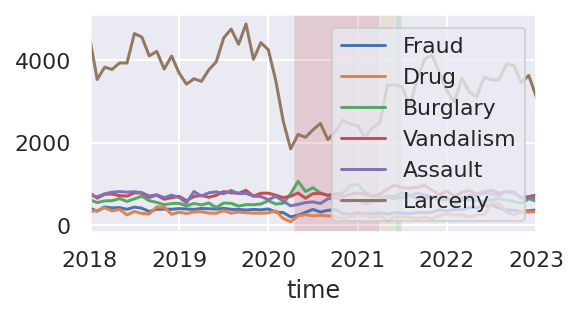

In [ ]:
fig, ax = plt.subplots()
crimes = ['Fraud', 'Drug', 'Burglary', 'Vandalism', 'Assault', 'Larceny']

coviddf = pd.DataFrame()

for crime in crimes:
    if crime == 'Vandalism':
        df = sf[sf['Incident Subcategory'].str.contains(crime, na=False)]
    else:
        df = sf[sf['Incident Category'].str.contains(crime, na=False)]
    df['time'] = pd.to_datetime(df['Incident Date'])
    df = df['Incident Date'].groupby(df.time.dt.to_period('M')).agg('count')
    df.plot(ax=ax, label=crime)
    coviddf[crime] = df

plt.legend(loc="lower right")
plt.axvspan(603.5, 615, facecolor='r', alpha=0.2)
plt.axvspan(615, 617, facecolor='y', alpha=0.2)
plt.axvspan(617, 618, facecolor='g', alpha=0.2)
plt.xlim(576, 636)

plt.show()

(576.0, 636.0)

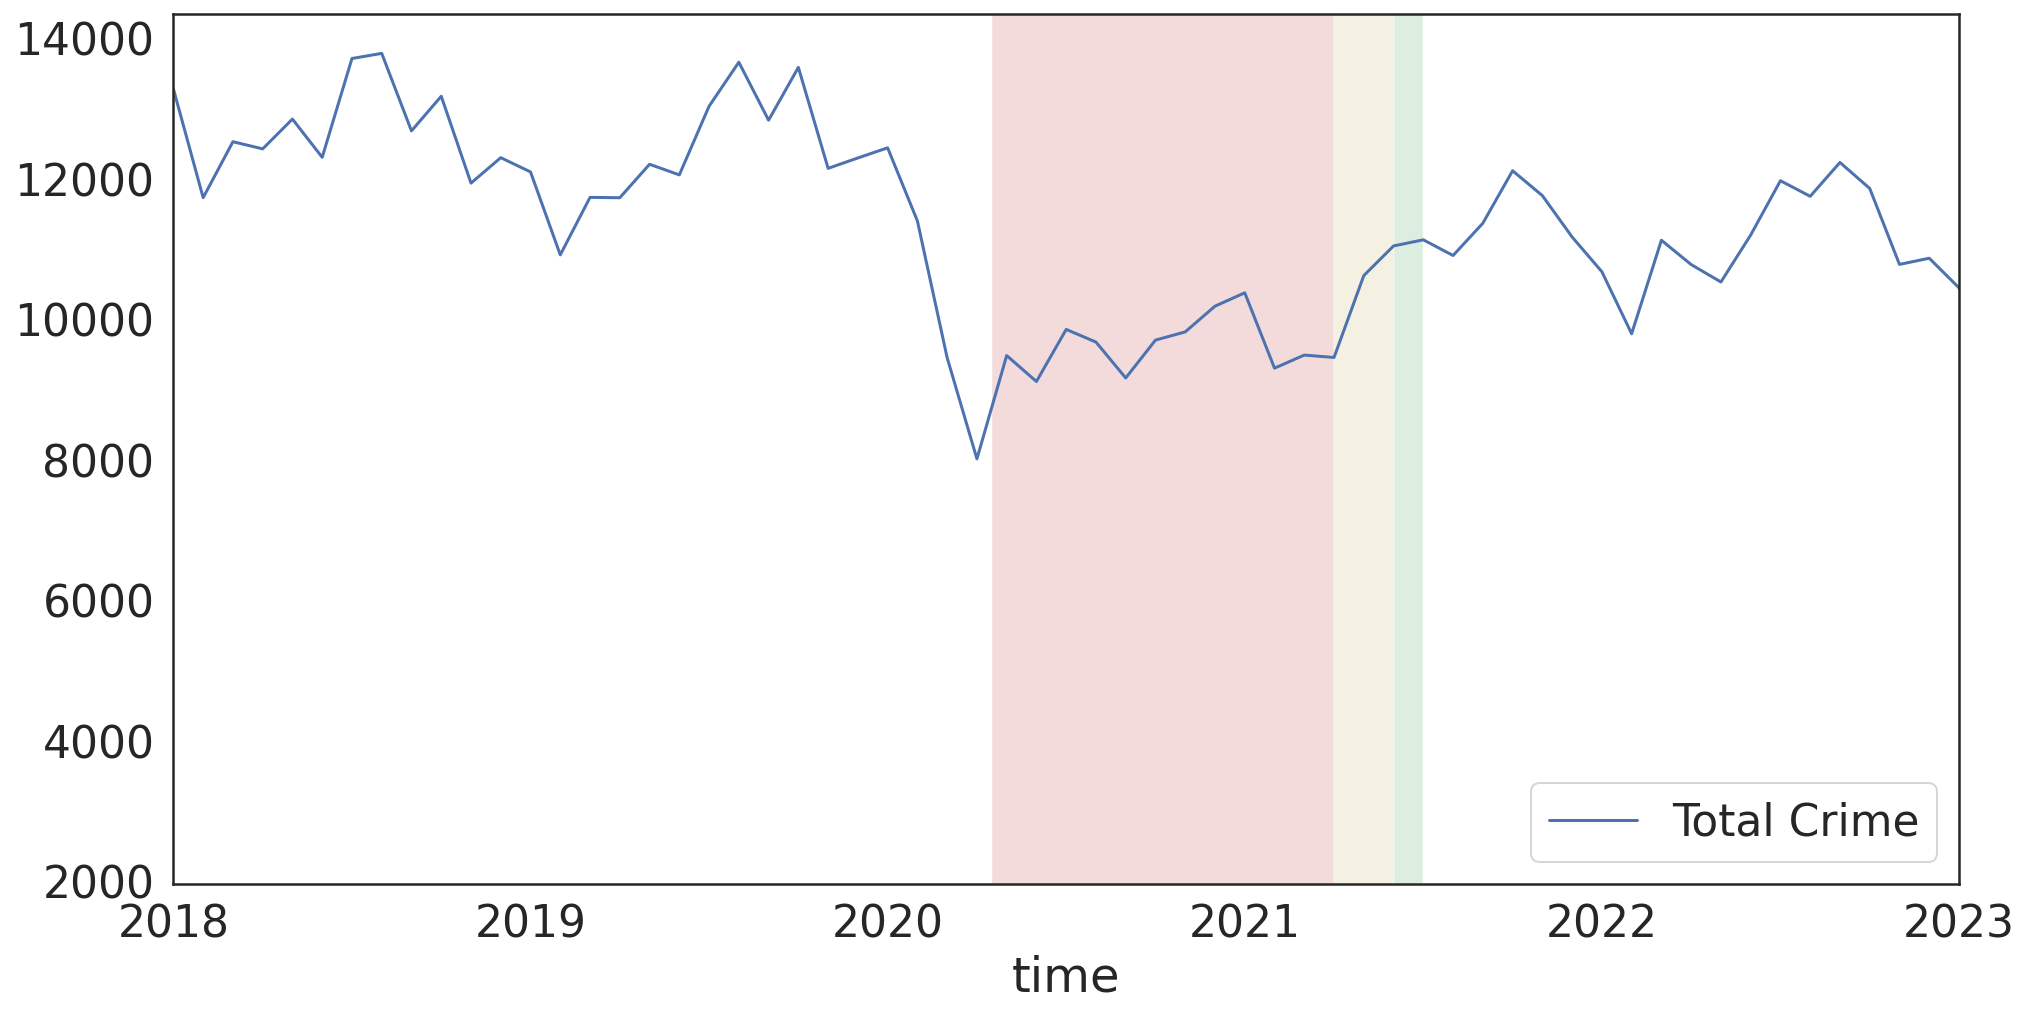

In [ ]:
fig, ax = plt.subplots()
df = sf
df['time'] = pd.to_datetime(df['Incident Date'])
df = df['Incident Date'].groupby(df.time.dt.to_period('M')).agg('count')
df.plot(ax=ax, label="Total Crime")


plt.legend(loc="lower right")
plt.axvspan(603.5, 615, facecolor='r', alpha=0.2)
plt.axvspan(615, 617, facecolor='y', alpha=0.2)
plt.axvspan(617, 618, facecolor='g', alpha=0.2)
plt.xlim(576, 636)


      time  Fraud  Drug  Burglary  Vandalism  Assault  Larceny
0  2018-01    415   337       619        782      724     4532
1  2018-02    341   356       550        657      693     3539
2  2018-03    444   423       592        751      763     3836
3  2018-04    420   348       596        759      804     3782
4  2018-05    429   384       649        718      816     3939
(63, 7) 

--------

   Fraud  Drug  Burglary  Vandalism  Assault  Larceny                 Covid
0   6382  5396      9135      11369    11804    63178  Jan 2018 to Apr 2019
1   4797  3223     12708      12131     9288    39078  Mar 2020 to Jun 2021


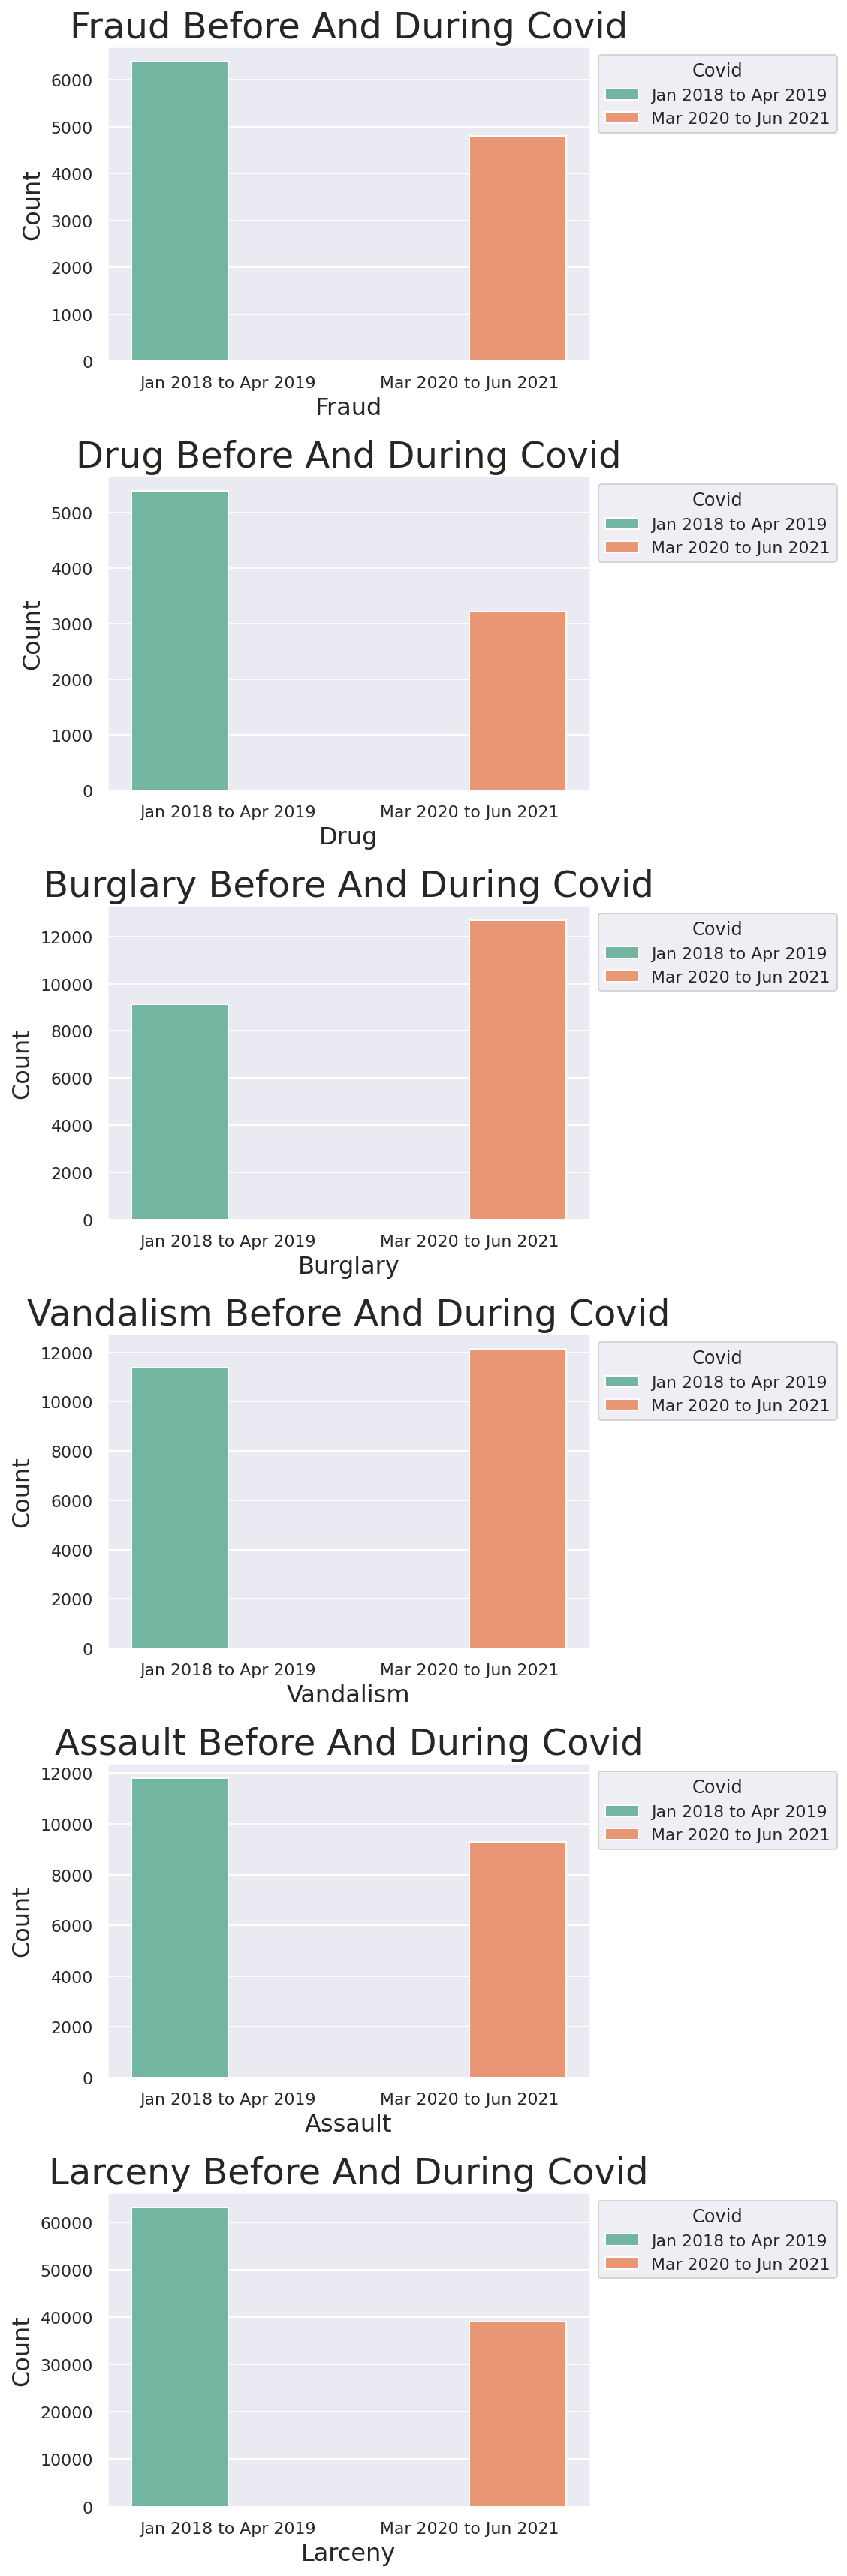

In [ ]:
#March 4, 2020 to June 15, 2021 is 16 months
#Jan 2018 to Apr 2019
currdf = coviddf.copy().reset_index()

print(currdf.head())
print(currdf.shape, '\n\n--------\n')

before = currdf.loc[(currdf['time'] >= '2018-01') & (currdf['time'] <= '2019-04')]
during = currdf.loc[(currdf['time'] >= '2020-03') & (currdf['time'] <= '2021-06')]

before = before[crimes].sum()
before['Covid']=0
during = during[crimes].sum()
during['Covid']=1

c_df = pd.DataFrame([before, during])
c_df.Covid.replace({0:"Jan 2018 to Apr 2019", 1:"Mar 2020 to Jun 2021"}, inplace=True)
print(c_df)

fig, axes = plt.subplots(len(crimes),1,figsize=(8, 4 * len(crimes)), tight_layout=True)
#sns.set(rc={'figure.figsize':(8,6)})

for i, crime in enumerate(crimes):
  ax = sns.barplot(x='Covid', y=crime, hue='Covid', data=c_df, palette=sns.color_palette("Set2"), ax = axes[i])
  ax.set_title(crime + " Before And During Covid",fontsize=24)
  ax.set_xlabel('Timeframe',fontsize=16)
  ax.set_ylabel('Count',fontsize=16)
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

# Statistical Analysis
In this section my goal is to compare the crime rates (per capita) of the months of the pandemic from the years 2010-2019. I'm going to set up a distribution of the crime rates and see how far the pandemic crime rate deviated and if it's statistically significant. 

In [ ]:
#Download (This will take a good while, this data set is fat)
#Only run once and just make copies whenever you clean so we preserve all data and don't have to download again
start = time.time()
la_crime_2010 = pd.read_csv('https://data.lacity.org/api/views/63jg-8b9z/rows.csv')
end = time.time()
print(end - start)

In [ ]:
la_crime_2010.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


# Cleaning 2010-2019 set

In [ ]:
crime_la_clean_2010 = la_crime_2010
crime_la_clean_2010 = la_crime_2010.drop(['DR_NO', 'Date Rptd','Rpt Dist No', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status','Status Desc' , 'LOCATION', 'Cross Street','LAT', 'LON' ], axis=1)
crime_la_clean_2010['time'] = pd.to_datetime(crime_la_clean_2010['DATE OCC'])
crime_la_clean_2010.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,time
0,02/20/2010 12:00:00 AM,1350,13,Newton,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,501.0,900.0,NaN,NaN,NaN,2010-02-20
1,09/12/2010 12:00:00 AM,45,14,Pacific,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,101.0,740.0,NaN,NaN,NaN,2010-09-12
2,08/09/2010 12:00:00 AM,1515,13,Newton,2,946,OTHER MISCELLANEOUS CRIME,0344,103.0,946.0,NaN,NaN,NaN,2010-08-09
3,01/05/2010 12:00:00 AM,150,6,Hollywood,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,101.0,900.0,998.0,NaN,NaN,2010-01-05
4,01/02/2010 12:00:00 AM,2100,1,Central,1,122,"RAPE, ATTEMPTED",0400,103.0,122.0,NaN,NaN,NaN,2010-01-02


2020 lies 1.376151656824709 standard deviations away from the mean


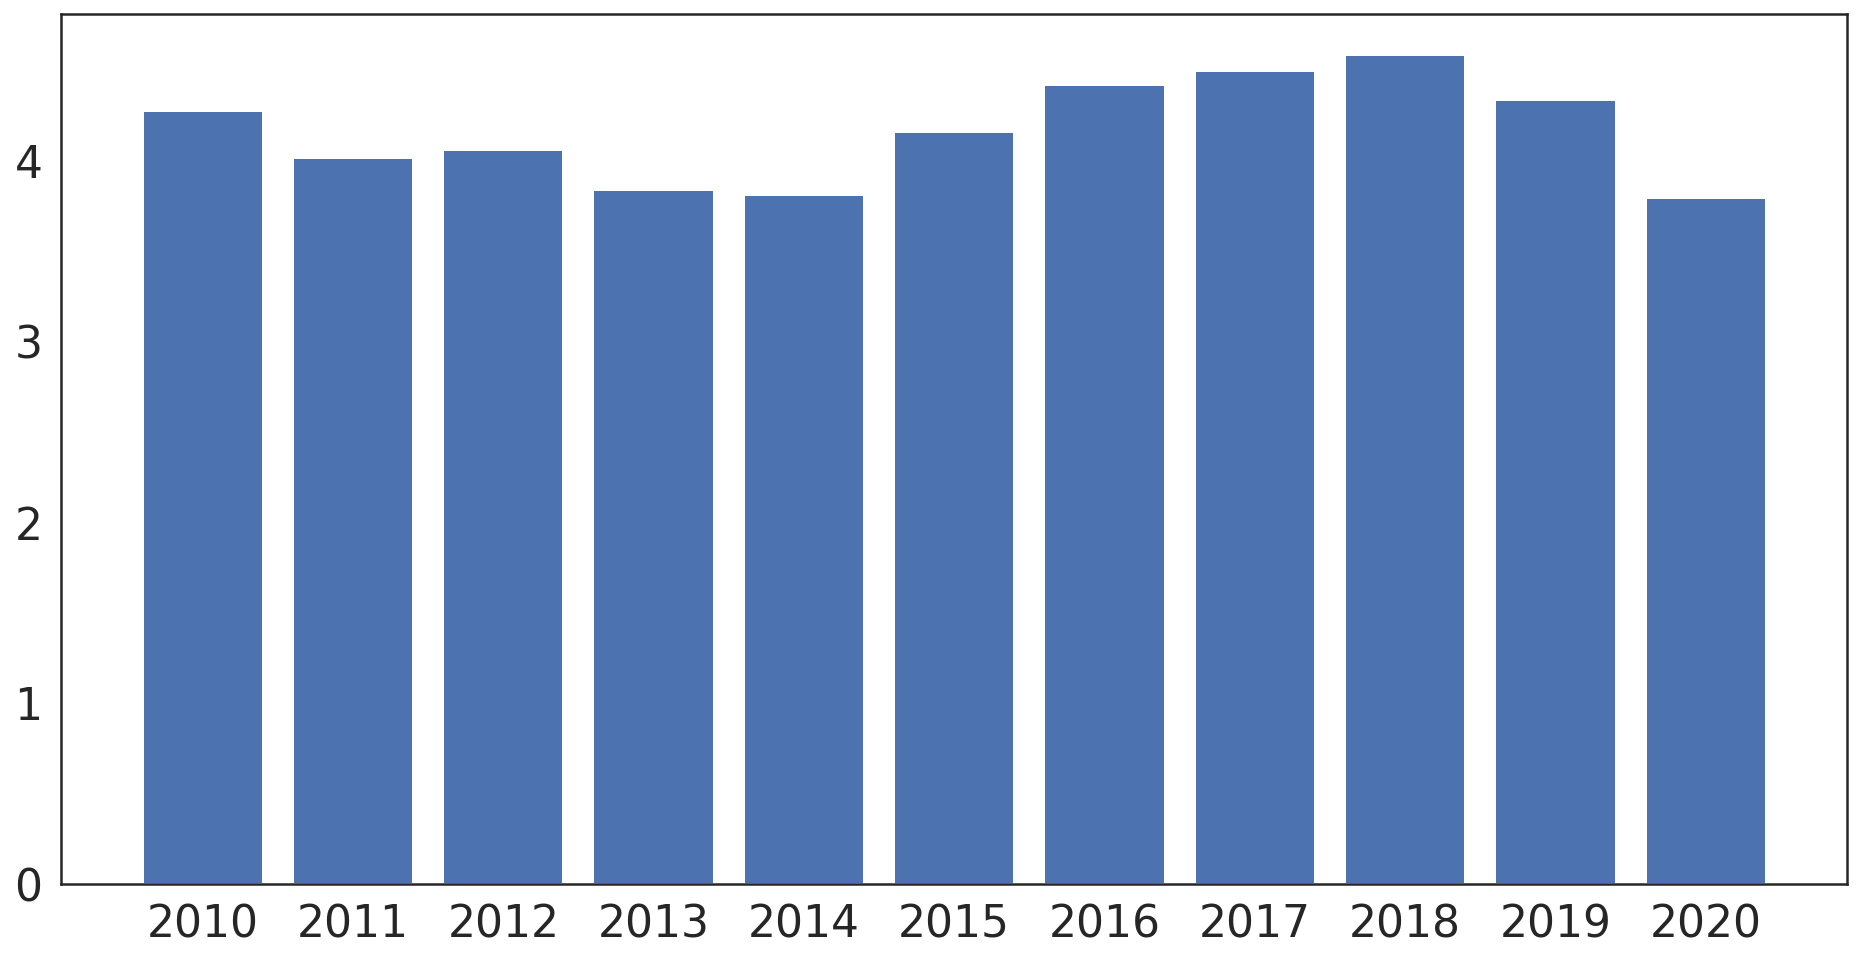

In [ ]:
#Lockdown lasted March 19th to June 15th
year_totals = {}
for i in range(10):
  year_totals[2010 + i] = 0
year_totals[2020] = 47184

for year in range(10):
  year = year + 2010
  start = datetime.datetime(year, 3, 19)
  end = datetime.datetime(year, 6, 15)
  filtered_time = crime_la_clean_2010[crime_la_clean_2010['time'] >= start]
  filtered_time = filtered_time[filtered_time['time'] <= end]
  year_totals[year] = len(filtered_time.index)

la_population = {
    2010: 12160000,
    2011: 12197000,
    2012: 12234000,
    2013: 12271000,
    2014: 12308000,
    2015: 12345000,
    2016: 12383000,
    2017: 12420000,
    2018: 12458000,
    2019: 12448000,
    2020: 12447000
}


names = list(year_totals.keys())
values = list(year_totals.values())
#plt.bar(range(len(year_totals)), values, tick_label=names)

year_totals_per_capita = {}
for year in range(11):
  year = year + 2010
  year_totals_per_capita[year] = year_totals[year] * 1000 / la_population[year]

names = list(year_totals_per_capita.keys())
values = list(year_totals_per_capita.values())
plt.bar(range(len(year_totals_per_capita)), values, tick_label=names)

deviation = np.std(values)
mean = np.mean(values)
dev_num = (mean - year_totals_per_capita[2020]) / deviation
print("2020 lies " + str(dev_num) + " standard deviations away from the mean")

differences = []
for year in range(10):
  year = year + 2010
  differences.append(abs(year_totals_per_capita[year] - year_totals_per_capita[year + 1]))



# Takeaways from this section
Per capita, the time frame of the lockdown had the lowest crime rate of 2010-2020. It also had the largest difference in crime rate year to year by a 36% margin.
If we find the standard deviation of the set, we find that 2020 had a 1.376 deviation away from the mean. Assuming the crime rates are normally distributed over close years, we find that being that far from the mean has a liklihood over about 10%. 